<h2 align="center"> Time Series Analysis of RainFall Data </h2>

---

## Objective and Data Description :

- Our objective is to predict the rainfall in Pune on based the data 

In [1]:
from datetime import datetime
import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt 

from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import warnings 
warnings.filterwarnings('ignore')


%matplotlib inline

# Data Analysis

In [2]:
rainfall_data_matrix1 = pd.read_csv("Mah_rain.csv")
rainfall_data_matrix = rainfall_data_matrix1.iloc[:,:]
rainfall_data_matrix

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5
1,1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9
2,1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2
3,1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4
4,1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2011,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0
111,2012,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0
112,2013,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3
113,2014,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1


In [3]:
rainfall_data_matrix.set_index('YEAR', inplace=True)
rainfall_data_T_matrix = rainfall_data_matrix.transpose()
#rainfall_data_T_matrix.set_index('Year', inplace=True)
rainfall_data_T_matrix

YEAR,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
JAN,18.8,7.8,7.6,0.4,0.0,10.5,0.5,0.3,1.2,0.0,...,0.0,1.3,0.0,0.0,2.9,0.0,0.0,0.1,3.1,1.4
FEB,0.6,0.0,0.0,4.7,1.2,0.8,3.7,0.0,0.1,0.0,...,0.0,0.4,0.0,1.7,0.1,0.3,0.0,5.3,6.2,0.8
MAR,7.7,0.1,0.0,1.7,0.0,0.0,1.5,4.7,0.7,1.0,...,7.1,0.0,18.1,0.8,0.9,0.3,0.0,0.8,24.4,41.2
APR,36.6,5.0,3.2,3.0,2.3,0.1,54.5,6.3,1.4,0.0,...,0.2,2.1,0.6,0.4,2.3,5.0,3.0,5.7,7.5,9.6
MAY,30.4,9.8,77.2,18.7,23.6,9.3,0.6,5.8,38.5,13.1,...,42.3,5.5,1.1,7.7,5.4,2.9,1.4,6.0,29.8,24.4
JUN,107.7,102.6,86.3,114.6,65.0,184.8,118.0,85.1,179.6,204.6,...,205.3,266.9,107.9,68.9,185.6,133.3,67.9,212.4,44.0,177.0
JUL,215.9,210.9,281.8,126.5,252.8,199.3,262.3,263.0,247.0,172.0,...,416.4,293.5,157.9,329.8,280.9,261.4,203.0,311.8,277.9,111.7
AUG,194.1,114.5,155.5,59.5,79.0,205.0,267.8,169.9,101.6,228.6,...,421.7,274.2,257.6,148.2,233.2,238.1,187.8,147.0,240.3,67.2
SEP,83.7,169.5,142.3,183.0,52.6,88.8,94.1,166.6,146.2,195.7,...,217.0,189.2,312.4,162.6,165.6,148.4,129.5,210.3,120.4,146.6
OCT,68.7,60.4,74.2,91.1,52.9,19.1,7.6,16.3,31.1,70.0,...,60.1,3.4,56.6,96.2,77.1,62.8,95.2,57.8,38.5,48.3


In [4]:
dates = pd.date_range(start='1901-01', freq='MS', periods=len(rainfall_data_T_matrix.columns)*12)
dates

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=1380, freq='MS')

In [5]:
len(dates)

1380

Text(0.5, 1.0, 'Month vs Precipitation across all years')

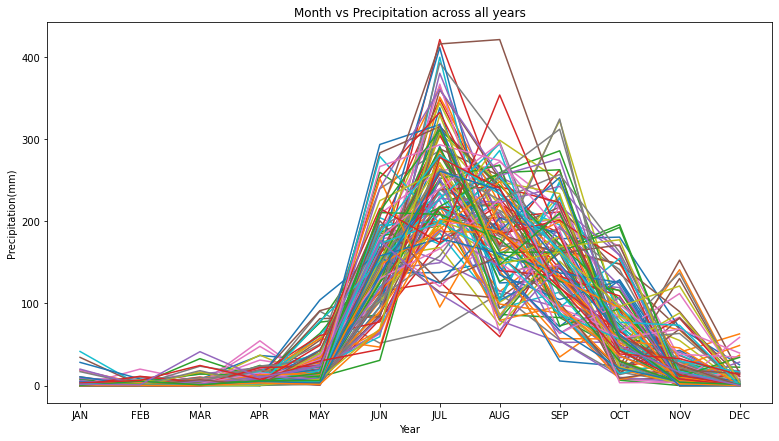

In [6]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_data_T_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

Text(0.5, 1.0, 'Month vs Precipitation across all years')

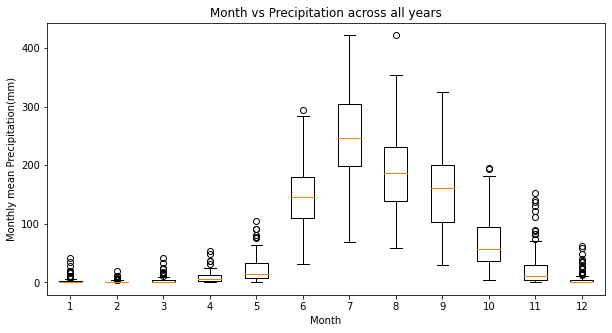

In [7]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

In [8]:
rainfall_data_matrix_np = rainfall_data_matrix.transpose().values

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np_reshaped = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

In [9]:
rainfall_data_matrix_np_reshaped.shape

(1380, 1)

In [10]:
rainfall_data_matrix_np_reshaped[:,0].shape

(1380,)

In [11]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np_reshaped[:,0],"Date":dates})
rainfall_data.set_index("Date",inplace=True)


#test_rainfall_data = rainfall_data.ix['1995': '2002']
#rainfall_data = rainfall_data.ix[: '1994']
rainfall_data.head()

,Precipitation
Date,
1901-01-01,18.8
1901-02-01,7.8
1901-03-01,7.6
1901-04-01,0.4
1901-05-01,0.0


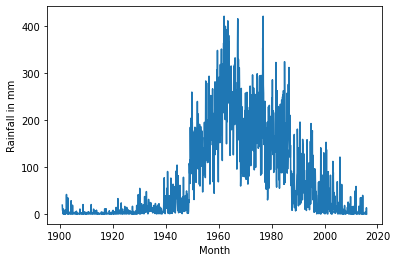

In [12]:
#ploting graph
plt.xlabel('Month')
plt.ylabel('Rainfall in mm')
plt.plot(rainfall_data)


# Decomposing Time Series

<Figure size 432x288 with 0 Axes>

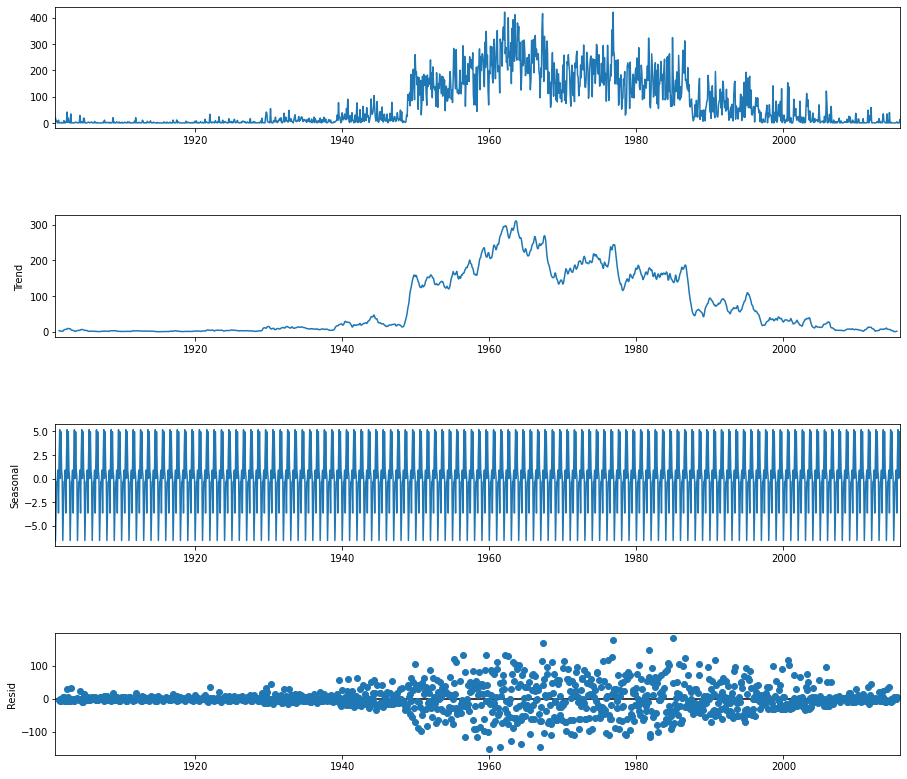

In [13]:
result = sm.tsa.seasonal_decompose(rainfall_data, model='additive') #Seasonal decomposition using moving averages

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 12)

# Stationarity cheak

In [14]:
#Determine rolling statistics
##rolling window


In [15]:
def rolling_stats(df): 
    rolmean = df.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd = df.rolling(window=12).std()
    plt.figure(figsize=(28,10))
    plt.plot(df,color = "black", label = "Origanal")
    plt.plot(rolmean,color = "RED", label = "Mean")
    plt.plot(rolstd,color = "Green", label = 'Standered deviation')
    plt.legend(loc='best')
    plt.title("Rolling Statistics")
    plt.show(block=False)

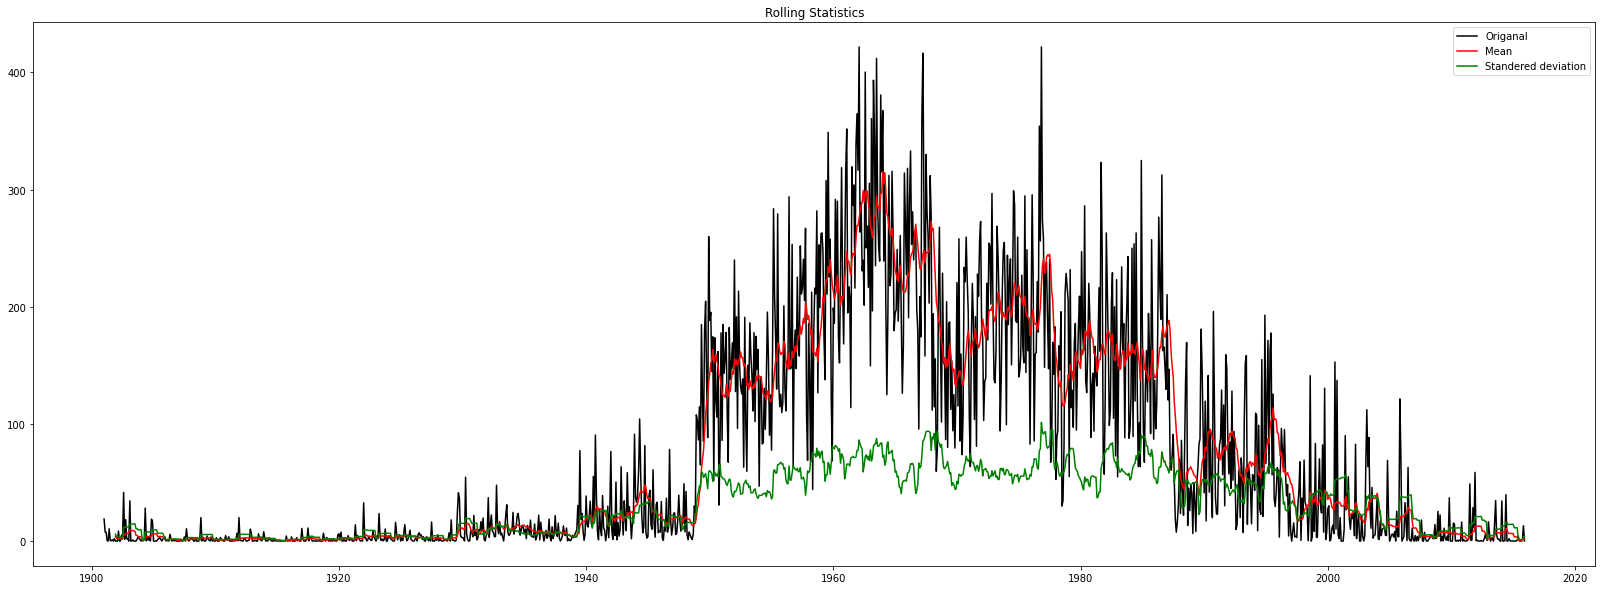

In [16]:
rolling_stats(rainfall_data)

<AxesSubplot:xlabel='Date'>

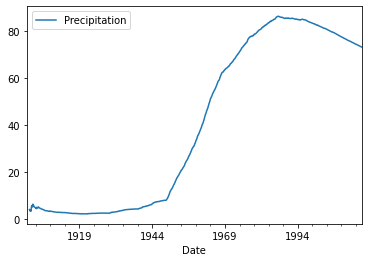

In [17]:
#expanding window
rainfall_data.expanding(min_periods=12).mean().plot()

<AxesSubplot:xlabel='Date'>

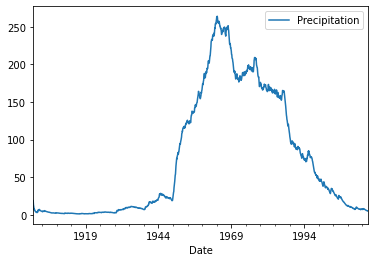

In [18]:
#exponantial moving avg
rainfall_data.ewm(span=60, min_periods=0, adjust = True).mean().plot()

In [19]:
#Performing Augmented Dickey–Fuller test:
def ADFT(df):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(df, autolag='AIC')

    useful_values =[v for v in dftest[:4]]
    useful_values.extend([dftest[4]["1%"],dftest[4]["5%"],dftest[4]["10%"]])
    res = pd.DataFrame({"Lables":["Test Stats","P-Value","#Lag Used","Number of Observation Used","Critical Value for 1%","Critical Value for 5%","Critical Value for 10%" ],"Value":useful_values})

    Pvalue = dftest[1]
    cutoff = 0.1
    if Pvalue < cutoff:    
        print('P-value = %.4f. The series is likely stationary.' % Pvalue)
    else:
        print('P-value = %.4f. The series is likely non-stationary.' % Pvalue)
    return res
 

In [20]:
def error(y_true, y_pred):
    mad = np.mean(abs((y_true-y_pred)))
    MSE = np.mean(np.square((y_true-y_pred)))
    RMSE = np.sqrt(MSE)
    smape = np.mean((np.abs(y_pred - y_true)*20/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAD: %.2f  \nRMSE: %.2f \nSMAPE: %.2f'% (mad,RMSE,smape))

In [21]:
res = ADFT(rainfall_data)
res

Results of Dickey Fuller Test:
P-value = 0.5047. The series is likely non-stationary.


,Lables,Value
0,Test Stats,-1.557927
1,P-Value,0.504686
2,#Lag Used,16.000000
3,Number of Observation Used,1363.000000
4,Critical Value for 1%,-3.435157
5,Critical Value for 5%,-2.863663
6,Critical Value for 10%,-2.567900


# Data Transformation to achieve Stationarity (Data Munging)

1. Differencing to create stationary data 
2. For removing trends


# 1. Time shifting

In [22]:

first_diff = rainfall_data - rainfall_data.shift(1)

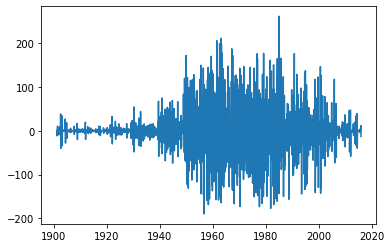

In [23]:
plt.plot(first_diff)

In [24]:
first_diff.dropna(inplace=True)

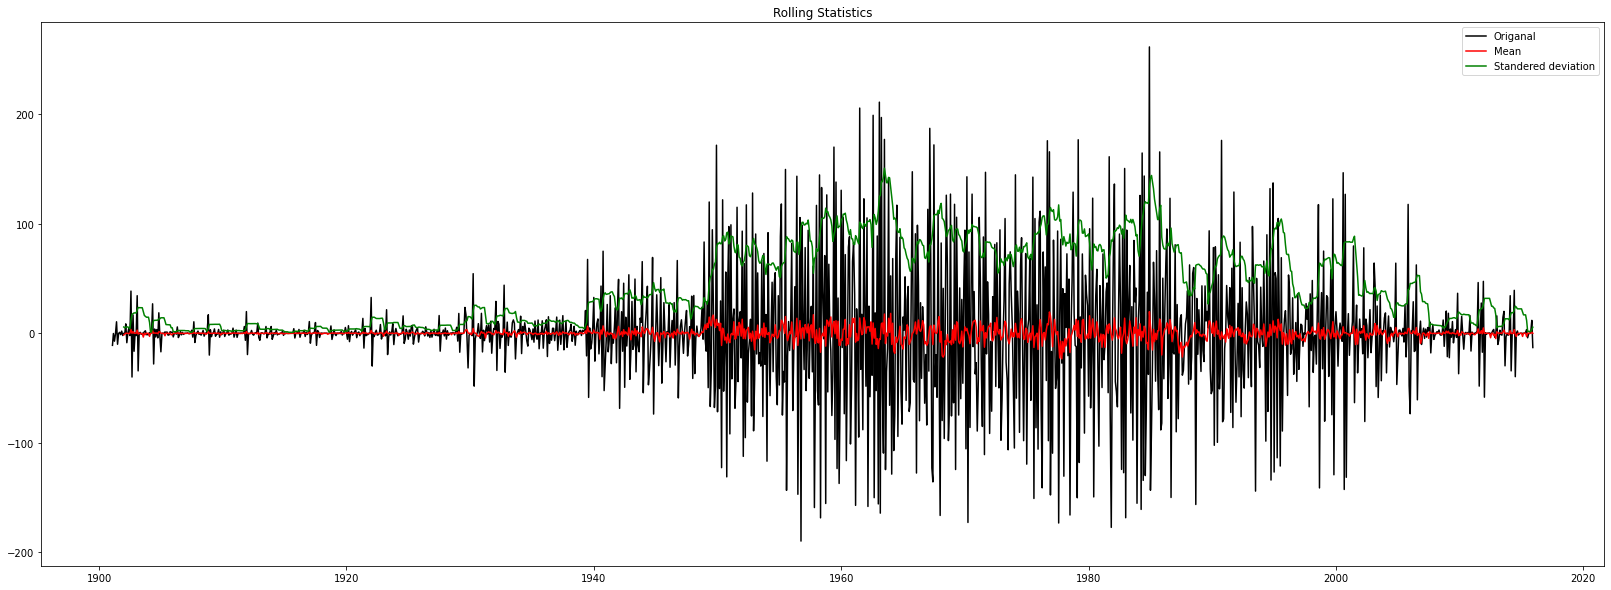

In [25]:
#rolling stats

rolling_stats(first_diff)


In [26]:
#Performing Augmented Dickey–Fuller test:
res = ADFT(first_diff)
res 

Results of Dickey Fuller Test:
P-value = 0.0000. The series is likely stationary.


,Lables,Value
0,Test Stats,-1.469524e+01
1,P-Value,3.005554e-27
2,#Lag Used,1.500000e+01
3,Number of Observation Used,1.363000e+03
4,Critical Value for 1%,-3.435157e+00
5,Critical Value for 5%,-2.863663e+00
6,Critical Value for 10%,-2.567900e+00


In [27]:
second_diff = rainfall_data - rainfall_data.shift(2)

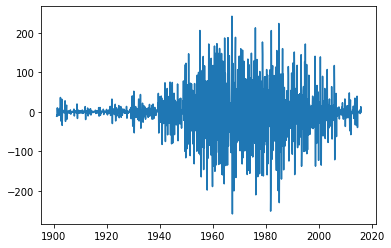

In [28]:
plt.plot(second_diff)

In [29]:
second_diff.dropna(inplace=True)

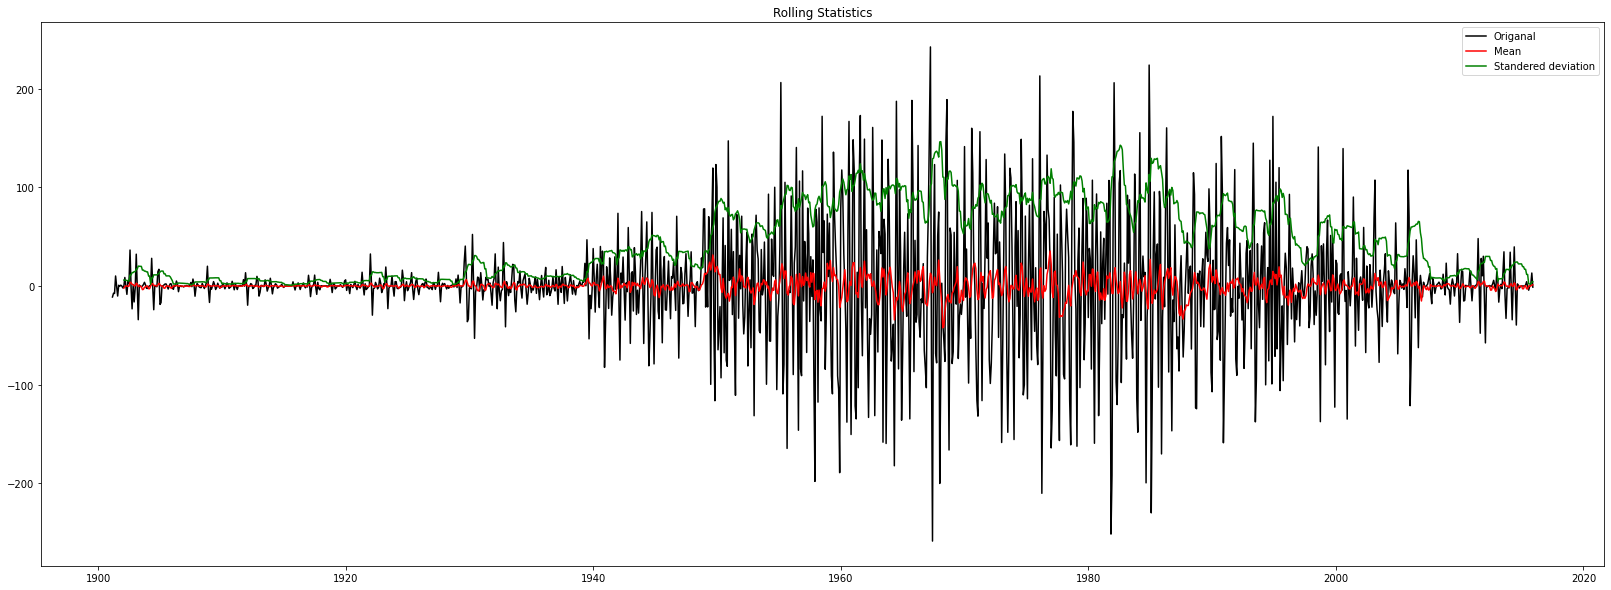

In [30]:
rolling_stats(second_diff)

In [31]:
result = ADFT(second_diff)
result

Results of Dickey Fuller Test:
P-value = 0.0000. The series is likely stationary.


,Lables,Value
0,Test Stats,-1.168991e+01
1,P-Value,1.662303e-21
2,#Lag Used,2.100000e+01
3,Number of Observation Used,1.356000e+03
4,Critical Value for 1%,-3.435182e+00
5,Critical Value for 5%,-2.863674e+00
6,Critical Value for 10%,-2.567906e+00


# 2. Log Transform 

In [32]:
log_data = np.log(rainfall_data)

In [33]:
log_diff = log_data-log_data.shift(1)

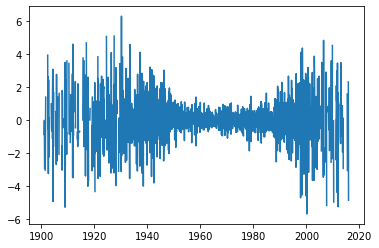

In [34]:
plt.plot(log_diff)

In [35]:
log_diff.dropna(inplace=True)

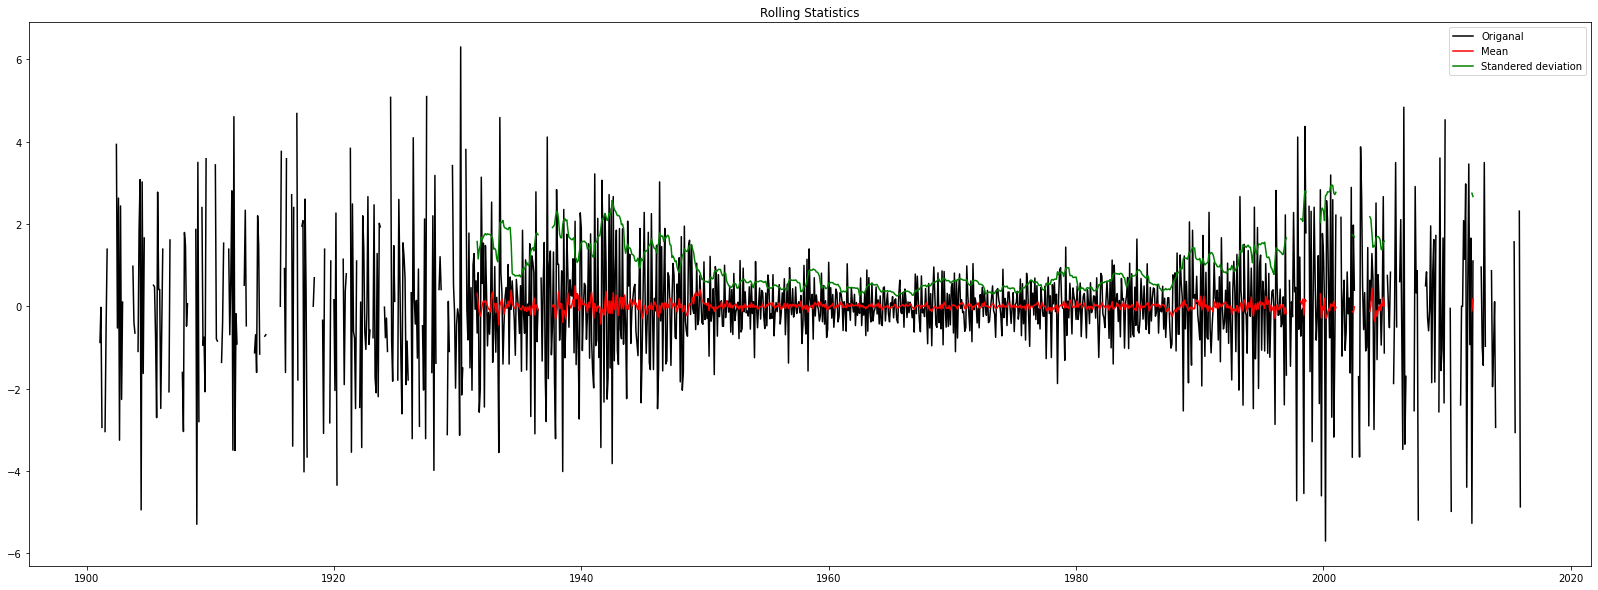

In [36]:
rolling_stats(log_diff)

# 3. Exponatial transformation

In [37]:

exponential_df = rainfall_data.ewm(halflife=12, min_periods=0, adjust=True).mean()


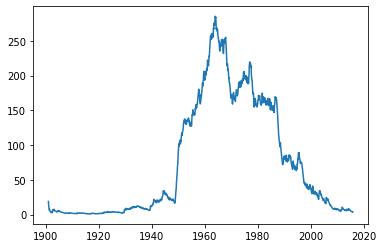

In [38]:
plt.plot(exponential_df)

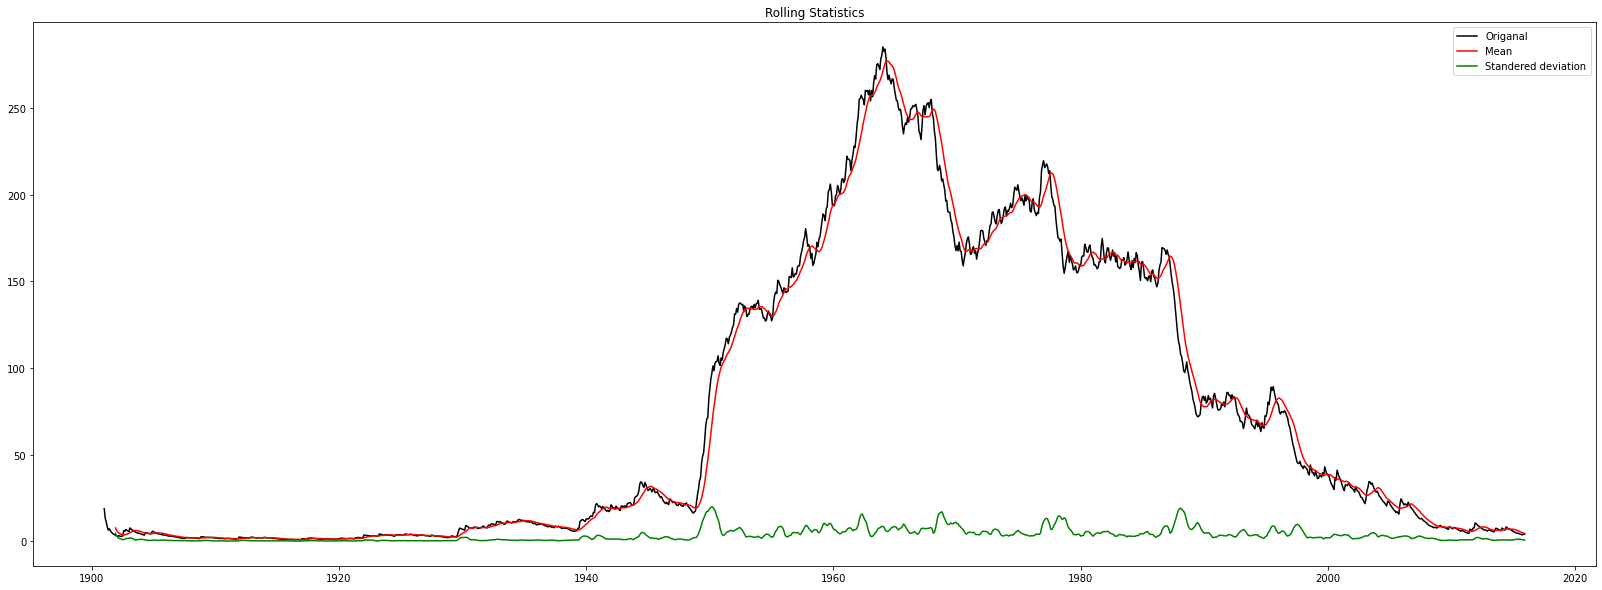

In [39]:
#rolling statistics 
rolling_stats(exponential_df)


In [40]:
res = ADFT(exponential_df)
res

Results of Dickey Fuller Test:
P-value = 0.7294. The series is likely non-stationary.


,Lables,Value
0,Test Stats,-1.063447
1,P-Value,0.729427
2,#Lag Used,7.000000
3,Number of Observation Used,1372.000000
4,Critical Value for 1%,-3.435125
5,Critical Value for 5%,-2.863649
6,Critical Value for 10%,-2.567893


In [41]:
exp_diff = exponential_df-exponential_df.shift(1)

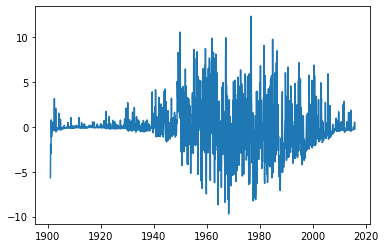

In [42]:
plt.plot(exp_diff)

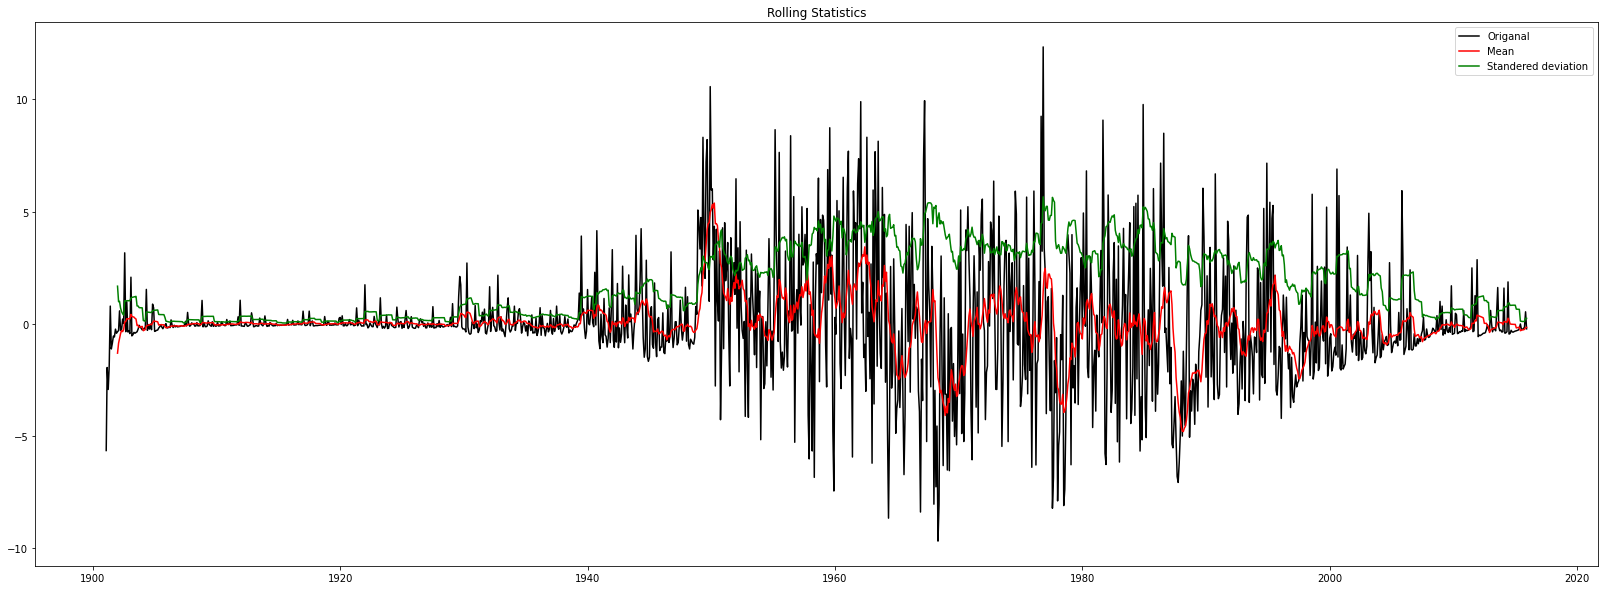

In [43]:
rolling_stats(exp_diff)

In [44]:
exp_diff.dropna(inplace=True)
result = ADFT(exp_diff)
result

Results of Dickey Fuller Test:
P-value = 0.0000. The series is likely stationary.


,Lables,Value
0,Test Stats,-1.038661e+01
1,P-Value,2.072146e-18
2,#Lag Used,6.000000e+00
3,Number of Observation Used,1.372000e+03
4,Critical Value for 1%,-3.435125e+00
5,Critical Value for 5%,-2.863649e+00
6,Critical Value for 10%,-2.567893e+00


### Observation:
- We have tried out 3 different transformation: time shift, log transformation, & exp decay. 
- We cant apply the log transform as our raw data containts a lot of zero values and log transform will convert them to infinity.
- The p-value of original data with diff is more than that of the data after exponatial decay transformed data.Hence we will continoue without the exponantial or log transformation.

# Data Splitting

In [45]:
size = int(0.95*len(dates))
train_df = rainfall_data[:size]

In [46]:
test_df = rainfall_data[size:]

In [47]:
test_dfS=rainfall_data[size:]

# Plotting ACF & PACF

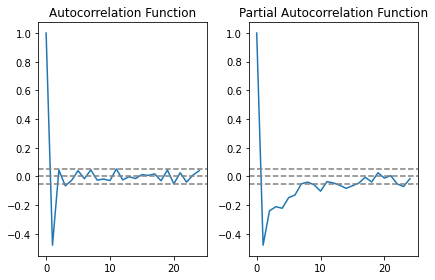

In [48]:
lag_acf = acf(first_diff,nlags=24)
lag_pacf = pacf(first_diff,nlags=24)

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

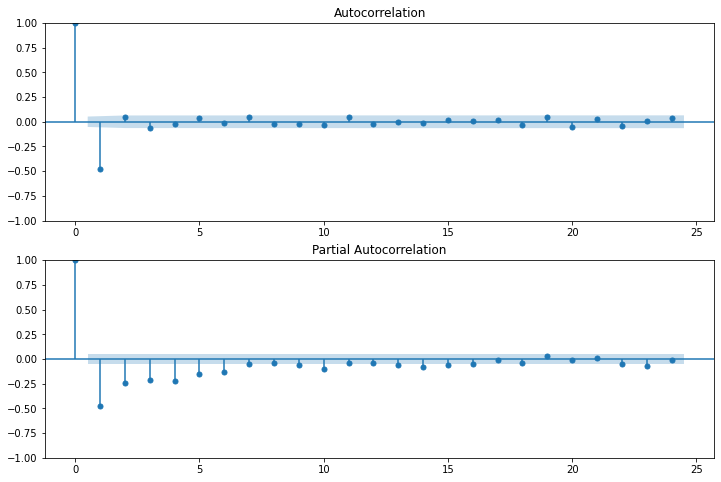

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=24, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=24, ax=ax2)

# Auto Arima for Estimating Parameters 

In [50]:
from pmdarima import auto_arima

In [51]:
fit = auto_arima(train_df,trace=True, surpress_warning = True,max_p=24,max_q=24,max_P=24,max_Q=24)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13694.610, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14311.024, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13972.101, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13705.573, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14309.024, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13696.832, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13693.541, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13698.721, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13897.466, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13693.868, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13840.483, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13695.787, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13691.541, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13696.721, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0

# Arima Model

In [52]:

arima_model = sm.tsa.arima.ARIMA(endog = train_df,order=(2, 1, 1))

In [53]:
ar_model= arima_model.fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Precipitation   No. Observations:                 1311
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -6841.770
Date:                Sun, 10 Jul 2022   AIC                          13691.541
Time:                        20:38:25   BIC                          13712.252
Sample:                    01-01-1901   HQIC                         13699.309
                         - 03-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1189      0.023      5.092      0.000       0.073       0.165
ar.L2          0.0848      0.022      3.912      0.000       0.042       0.127
ma.L1         -0.8971      0.012    -76.841      0.000      -0.920      -0.874
sigma2      2011.3833     52.902     38.021      0.000    1907.698    2115.068
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               363.24
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              57.34   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecasting

In [54]:
start_index = size
end_index = 1380
forcast = ar_model.predict(start = start_index, end= end_index)  
#train_logdf[start_index:end_index][["Accidental deaths in USA", 'forecast']].plot(figsize=(12, 8))

In [55]:
test_df["Forecast"]= forcast

In [56]:
test_df[test_df['Forecast'] < 0] = 0
test_df

,Precipitation,Forecast
Date,,
2010-04-01,14.6,7.575583
2010-05-01,0.1,7.951029
2010-06-01,0.0,7.332273
2010-07-01,0.8,7.290541
2010-08-01,0.0,7.233118
...,...,...
2015-08-01,0.0,7.213988
2015-09-01,0.0,7.213988
2015-10-01,1.3,7.213988


In [57]:
error(test_df["Precipitation"],test_df['Forecast'])

MAD: 8.79  
RMSE: 12.10 
SMAPE: 15.43


<AxesSubplot:xlabel='Date'>

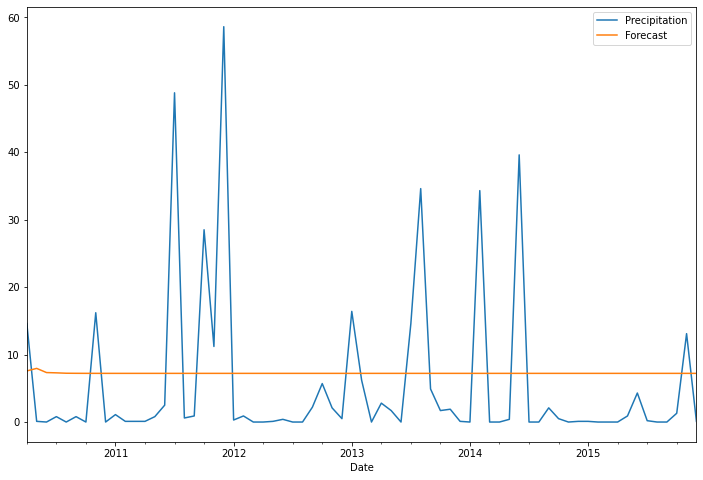

In [58]:
test_df[["Precipitation", 'Forecast']].plot(figsize=(12, 8))

# Sarima Model

In [59]:
sarima_model = sm.tsa.statespace.SARIMAX(train_df, trend='n', order=(2,1,1),seasonal_order=(2, 1, 1, 12)).fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Precipitation   No. Observations:                 1311
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -6807.365
Date:                            Sun, 10 Jul 2022   AIC                          13628.729
Time:                                    20:38:37   BIC                          13664.909
Sample:                                01-01-1901   HQIC                         13642.305
                                     - 03-01-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1141      0.024      4.749      0.000       0.067       0.161
ar.L2          0.0859      0.023   

# Forecasting Using SARIMA

In [60]:
start_index = size
end_index = 1380
test_dfS['forecast'] = sarima_model.predict(start = start_index, end= end_index, typ="labels")  

In [61]:
rainfall_data['Predictions'] = sarima_model.predict(start = size, end= end_index, typ="labels") 

In [62]:
test_dfS[test_dfS['forecast'] < 0] = 0
test_dfS

,Precipitation,forecast
Date,,
2010-04-01,14.6,7.977218
2010-05-01,0.1,9.618540
2010-06-01,0.0,3.969147
2010-07-01,0.8,9.290870
2010-08-01,0.0,12.712175
...,...,...
2015-08-01,0.0,13.201031
2015-09-01,0.0,8.005625
2015-10-01,1.3,12.944589


# Visualizing the Forecast

<AxesSubplot:xlabel='Date'>

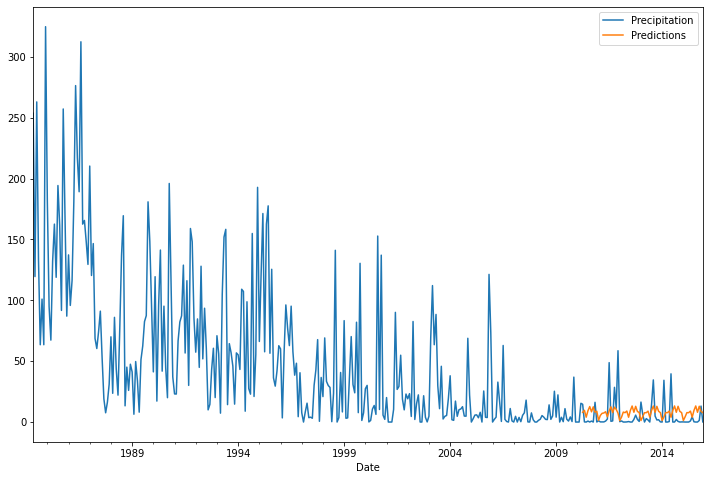

In [63]:
rainfall_data[1000:][['Precipitation', 'Predictions']].plot(figsize=(12,8))

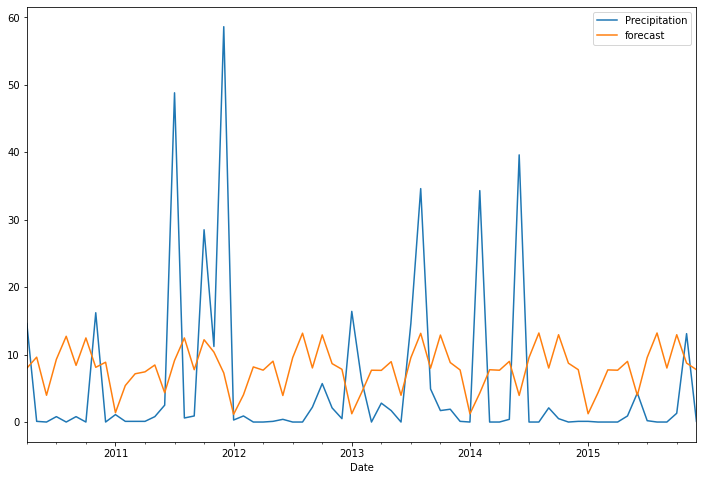

In [64]:
test_dfS[["Precipitation", 'forecast']].plot(figsize=(12, 8))
plt.show()

# Calculating the Errors

In [65]:
error(test_dfS["Precipitation"],test_dfS['forecast'])

MAD: 9.34  
RMSE: 12.67 
SMAPE: 15.24
